<a href="https://colab.research.google.com/github/ellaodinec/EllaOdinec/blob/main/FINAL_PAPER_Ella_Odinec_Data_Science_Research_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting a Fetus' Health with a Heart Rate Histogram and Other Heart Rate Information

Ella Odinec

**Abstract**

  The majority of maternal, newborn, and
child deaths that occur, especially in low
resource communities, are preventable.
Heart rate histograms and
cardiotocograms are an accessible and
efficient way to evaluate a fetus’ heart. This study aims to determine how well a heart rate histogram can predict a fetus' health. To address this question, two random forest classifier machine learning models were created, one with only heart rate histogram attributes and the other with heart rate histogram attributes and other heart rate information. These machine learning models show that a heart rate histogram alone does not
predict a fetus’ health well, however,
when histogram attributes are paired with
other heart rate information
(accelerations, decelerations, variability),
which can be suggested/flagged from a
histogram, the model performs much
better. This is important because if heart rate histograms and other heart rate information can be used to predict a fetus' health, newborn, mother, and child deaths can be prevented.

**Background**

The majority of maternal, newborn, and child deaths that occur, especially in low resource communities, are preventable. Heart rate histograms and
cardiotocograms are an accessible and
efficient way to evaluate a fetus’ heart. A heart rate histogram is a visual representation of the distribution of a fetus' heart rate measurements over a specific period. A cartiotocogram is a technique to monitor fetal heart rate and uterine contractions. These two tools offer necessary insights into fetal and mother wellbeing during and after pregnancy.


**Research Question**

How well can a heart rate histogram predict a fetus' health?

**Hypothesis**

There is a connection between the attributes of a heart rate histogram and fetal health, and these attributes can be used to predict the health of a fetus.

**Figures with Descriptions**

In [ ]:
#Libraries
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy # you can comment this out after the first time - Kyla
import numpy as np

!pip install matplotlib # you can comment this out after the first time
import matplotlib.pyplot as plt

!pip install scikit-learn # you can comment this out after the first time
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel, f_oneway

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import statsmodels.stats.multicomp as mc


In [2]:
#Dataset
df  = pd.read_csv('/content/fetal_health.csv')

NameError: name 'pd' is not defined

**Research Question**: How well can a heart rate histogram be used to predict a fetus’ health?

Looking at decelerations, abnormal variability, baseline heart rate, and accelerations too because they can all because a heart rate histogram can find/suggest if they are present in a fetus' heart rate

**Understand Your Data Set**:
* see [this](https://colab.research.google.com/drive/1PYaue0QkaKmNu0qnuEiTMkT2a0Z1hb6z#scrollTo=jjB4kUvFslGy) google colab for exploratory data analysis
*   all variables are cateogrical --> fetus_health is coded as 1,2,3 but each number represents a health classification (normal, suspected, pathological)
- comparing many variables that relate to fetus heart rate and other qualities and how they impact fetus health
- This dataset contains 2126 records of features extracted from Cardiotocogram exams
- where are these cardiotocograms come from? are the representative of a certain population? How generalized can conclusions from this dataset be?
- surface level info abt variability, decelerations, and accelerations can be found from a heart rate histogram --> should I include this in my data analysis








*  A fetal heart rate histogram is a visual representation of the distribution of a fetus's heart rate measurements over a specific period
* heart rate histograms show patterns of a fetus' heart rate which can reveal helpful information about their health
- heart rate histograms can be used to find accelerations, decelerations, and variability of a fetus' heart rate which then also reveal helpful information about their health
- healthcare providers can identify potential issues early on through heart rate histograms
- a low average heart rate indicates potential issues with a fetus' wellbeing

**Understanding Dataset**

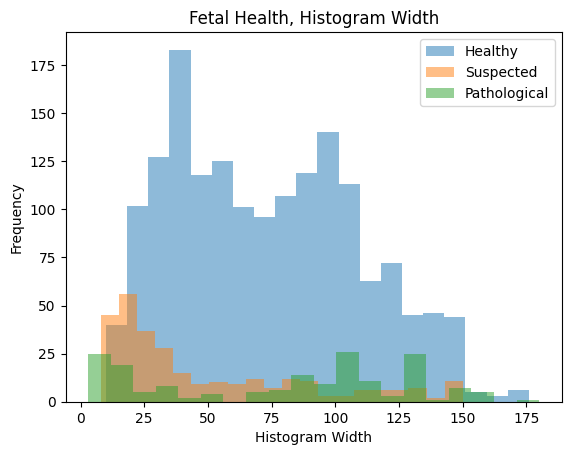

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_width'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_width'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_width'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Width")
plt.xlabel('Histogram Width')
plt.ylabel('Frequency')

plt.show()

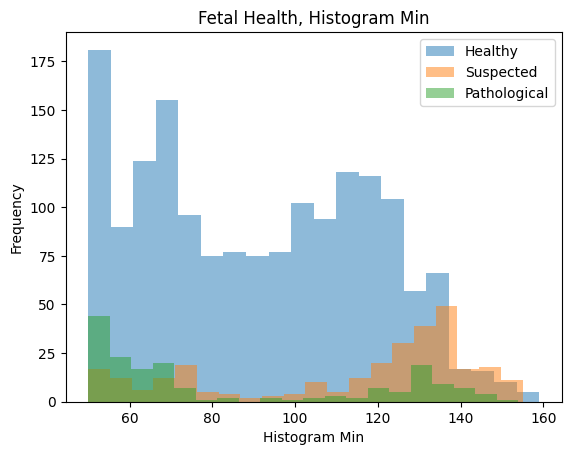

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_min'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_min'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_min'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Min")
plt.xlabel('Histogram Min')
plt.ylabel('Frequency')

plt.show()

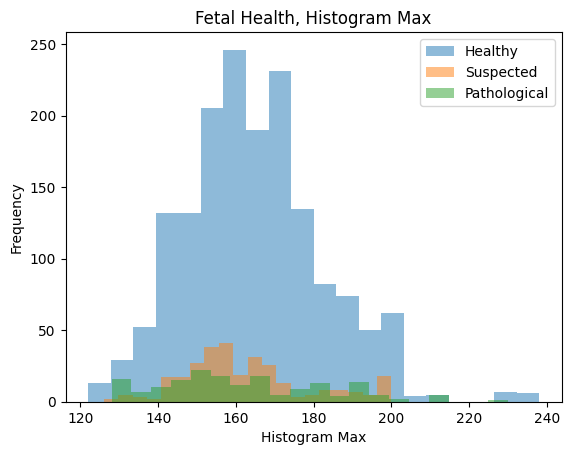

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_max'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_max'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_max'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Max")
plt.xlabel('Histogram Max')
plt.ylabel('Frequency')

plt.show()

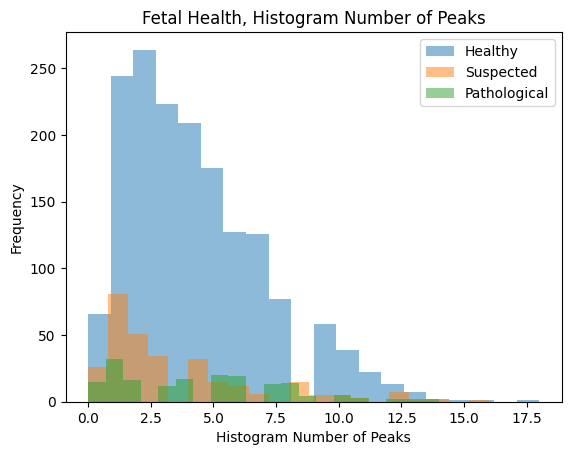

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_number_of_peaks'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_number_of_peaks'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_number_of_peaks'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Number of Peaks")
plt.xlabel('Histogram Number of Peaks')
plt.ylabel('Frequency')

plt.show()

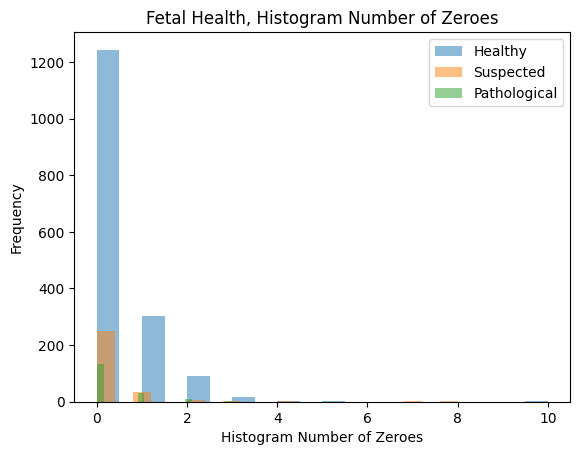

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_number_of_zeroes'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_number_of_zeroes'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_number_of_zeroes'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Number of Zeroes")
plt.xlabel('Histogram Number of Zeroes')
plt.ylabel('Frequency')

plt.show()

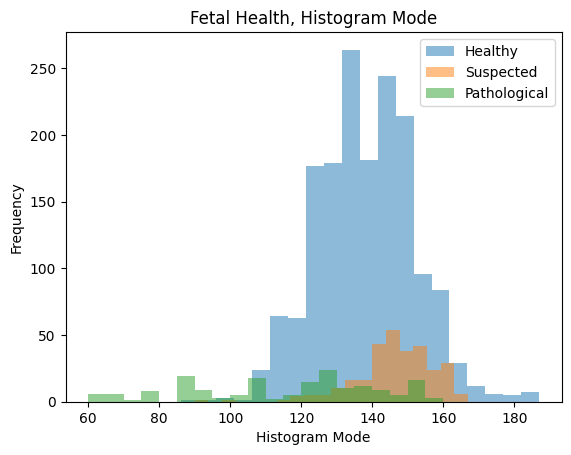

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_mode'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_mode'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_mode'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Mode")
plt.xlabel('Histogram Mode')
plt.ylabel('Frequency')

plt.show()

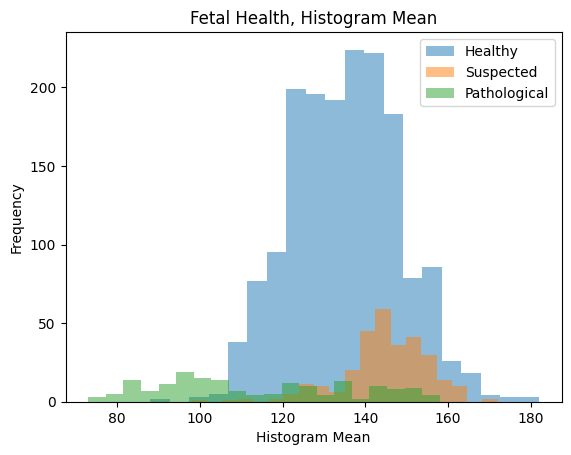

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_mean'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_mean'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_mean'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Mean")
plt.xlabel('Histogram Mean')
plt.ylabel('Frequency')

plt.show()

It looks like the fetuses with the slowest avg heart rate are typically pathological (unhealthy)

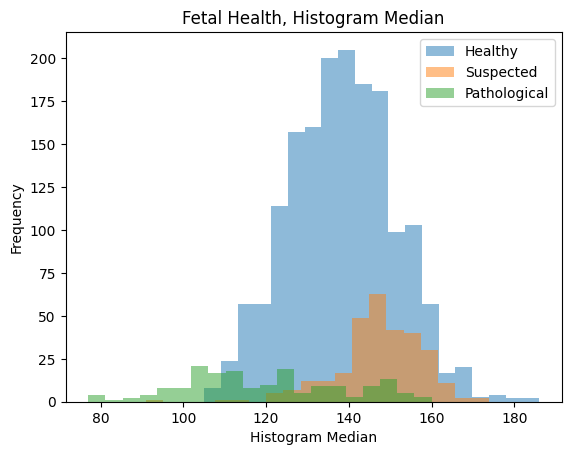

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_median'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_median'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_median'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Median")
plt.xlabel('Histogram Median')
plt.ylabel('Frequency')

plt.show()

Again, lowest heart rates for mean median and mode all point to pathological

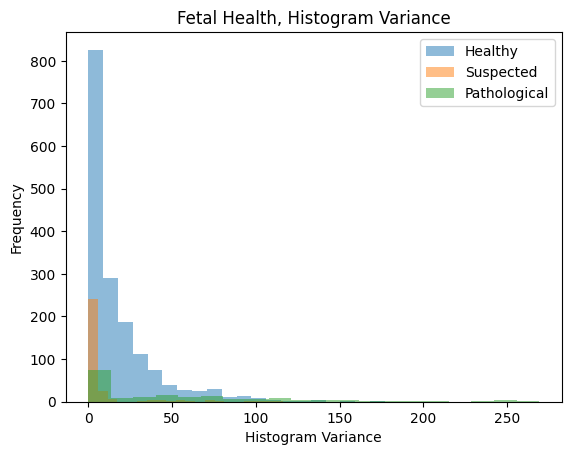

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_variance'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_variance'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_variance'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Variance")
plt.xlabel('Histogram Variance')
plt.ylabel('Frequency')

plt.show()

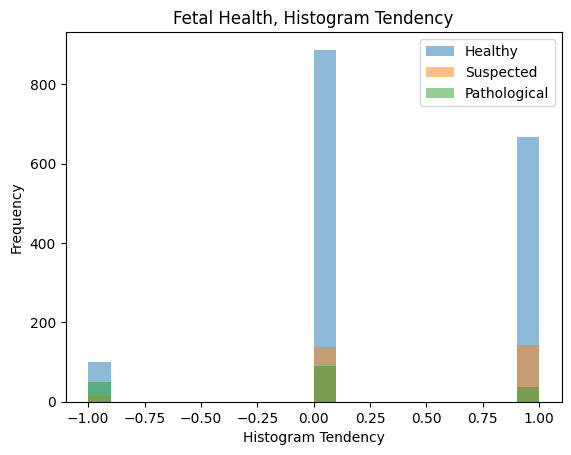

In [ ]:
# Can you explain what you are explaining with this graph?

plt.hist(df[df['fetal_health'] == 1]['histogram_tendency'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_tendency'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_tendency'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Tendency")
plt.xlabel('Histogram Tendency')
plt.ylabel('Frequency')

plt.show()

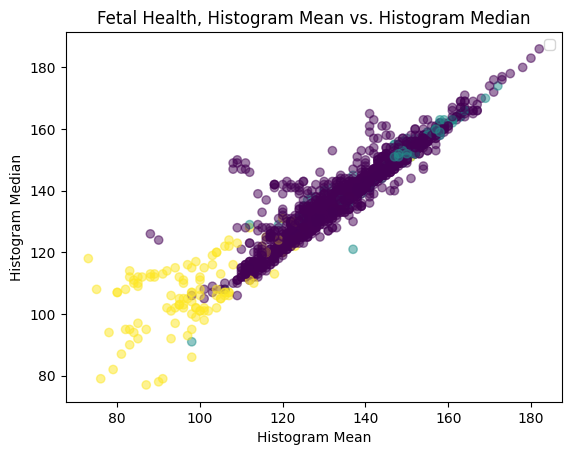

In [ ]:
plt.scatter(df['histogram_mean'], df['histogram_median'], c=df['fetal_health'], cmap='viridis', alpha=0.5)
plt.legend()
plt.ylabel("Histogram Median")
plt.xlabel("Histogram Mean")
plt.title("Fetal Health, Histogram Mean vs. Histogram Median")
plt.show()

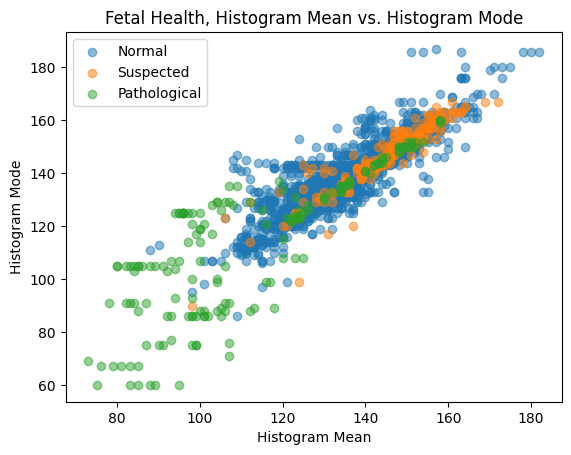

In [ ]:
plt.scatter(df[df['fetal_health']==1]['histogram_mean'], df[df['fetal_health']==1]['histogram_mode'], alpha = 0.5, label = 'Normal')
plt.scatter(df[df['fetal_health']==2]['histogram_mean'], df[df['fetal_health']==2]['histogram_mode'], alpha = 0.5, label = 'Suspected')
plt.scatter(df[df['fetal_health']==3]['histogram_mean'], df[df['fetal_health']==3]['histogram_mode'], alpha = 0.5, label = 'Pathological')

plt.legend()
plt.ylabel("Histogram Mode")
plt.xlabel("Histogram Mean")
plt.title("Fetal Health, Histogram Mean vs. Histogram Mode")
plt.show()

relationship btwn mean and median, also lowest values of each lead to pathological and suspected on the higher end of both

fetal_health
1.0    135.102115
2.0    144.759322
3.0    112.977273
Name: histogram_mean, dtype: float64


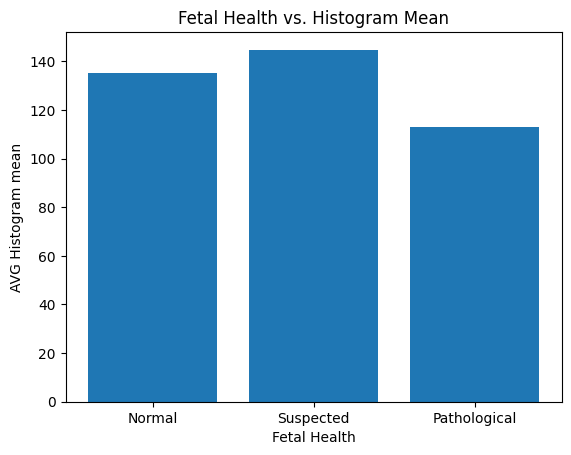

In [ ]:
categories = ['Normal', 'Suspected', 'Pathological']
bars = df.groupby('fetal_health')['histogram_mean'].mean()
print(bars)


plt.bar(categories, bars)
plt.ylabel("AVG Histogram mean")
plt.xlabel("Fetal Health")
plt.title("Fetal Health vs. Histogram Mean")
plt.show()

pathological lowest

fetal_health
1.0    138.459819
2.0    147.071186
3.0    119.562500
Name: histogram_median, dtype: float64


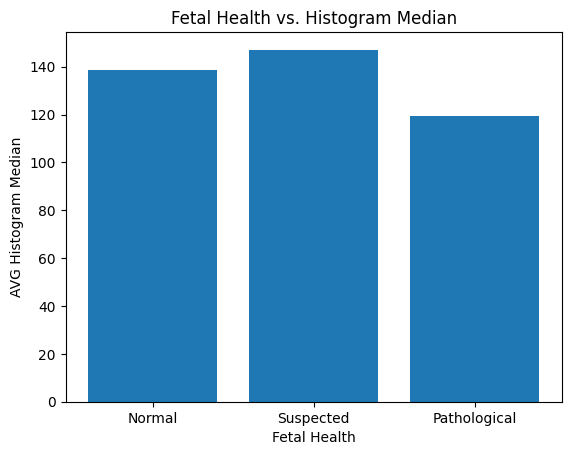

In [ ]:
categories = ['Normal', 'Suspected', 'Pathological']
bars = df.groupby('fetal_health')['histogram_median'].mean()
print(bars)

plt.bar(categories, bars)
plt.ylabel("AVG Histogram Median")
plt.xlabel("Fetal Health")
plt.title("Fetal Health vs. Histogram Median")
plt.show()

fetal_health
1.0    138.258610
2.0    146.555932
3.0    114.607955
Name: histogram_mode, dtype: float64


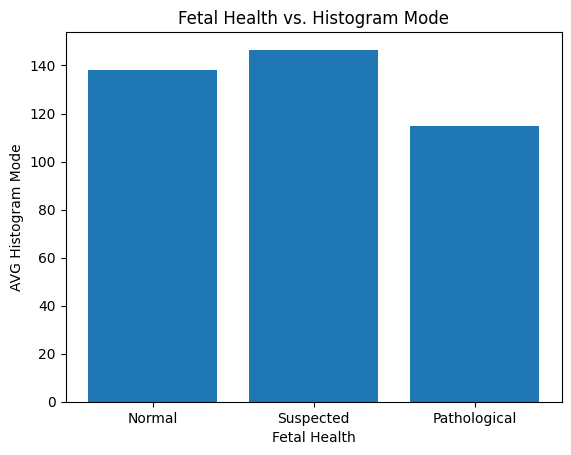

In [ ]:
categories = ['Normal', 'Suspected', 'Pathological']
bars = df.groupby('fetal_health')['histogram_mode'].mean()
print(bars)

plt.bar(categories, bars)
plt.ylabel("AVG Histogram Mode")
plt.xlabel("Fetal Health")
plt.title("Fetal Health vs. Histogram Mode")
plt.show()

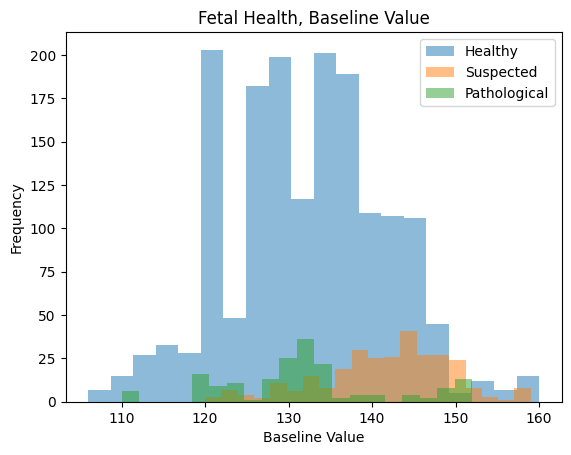

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['baseline value'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['baseline value'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['baseline value'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Baseline Value")
plt.xlabel('Baseline Value')
plt.ylabel('Frequency')

plt.show()

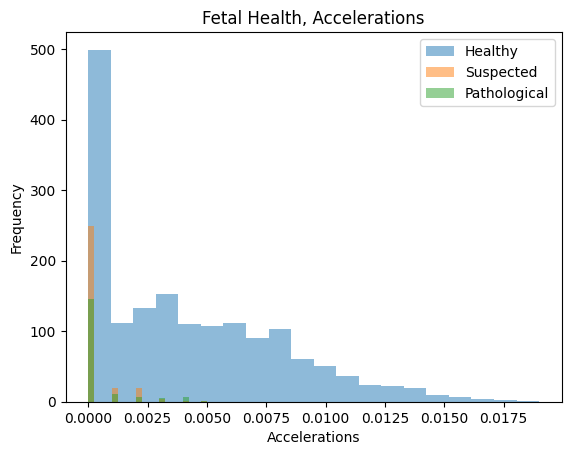

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['accelerations'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['accelerations'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['accelerations'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Accelerations")
plt.xlabel('Accelerations')
plt.ylabel('Frequency')

plt.show()

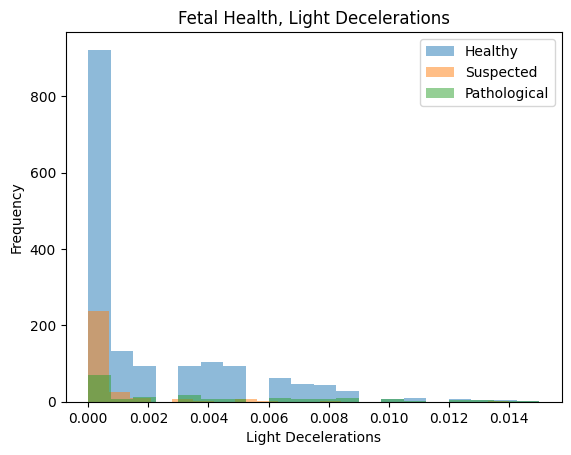

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['light_decelerations'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['light_decelerations'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['light_decelerations'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Light Decelerations")
plt.xlabel('Light Decelerations')
plt.ylabel('Frequency')

plt.show()

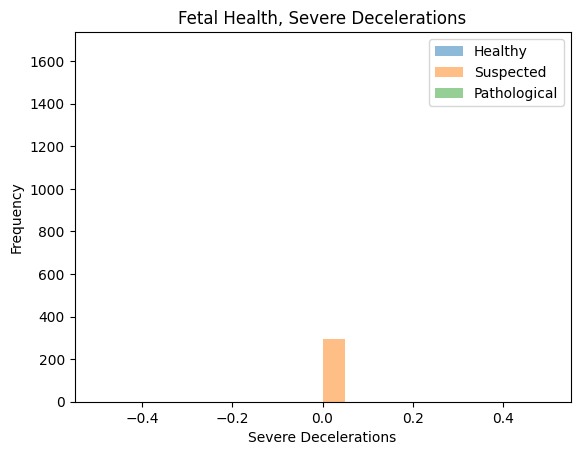

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['severe_decelerations'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['severe_decelerations'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['severe_decelerations'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Severe Decelerations")
plt.xlabel('Severe Decelerations')
plt.ylabel('Frequency')

plt.show()

**Plan the Research Design**
*  test my question through creating a machine learning model with all of the histogram data
- test my question by using t tests to see how significant the histogram results are
- create confusion matrixes, correlation tables, histograms, box plots, violin plots, and other plots to represent data in a way that informs the question
- hoping to find correlation, predictive and descriptive results

**Clean and Prepare Data for Analysis**

In [ ]:
#new dataset with only the variables I want to focus on to answer my research question
df_h = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']]
print(df_h)

      histogram_width  histogram_min  histogram_max  \
0                64.0           62.0          126.0   
1               130.0           68.0          198.0   
2               130.0           68.0          198.0   
3               117.0           53.0          170.0   
4               117.0           53.0          170.0   
...               ...            ...            ...   
2121             40.0          137.0          177.0   
2122             66.0          103.0          169.0   
2123             67.0          103.0          170.0   
2124             66.0          103.0          169.0   
2125             42.0          117.0          159.0   

      histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
0                           2.0                         0.0           120.0   
1                           6.0                         1.0           141.0   
2                           5.0                         1.0           141.0   
3                      

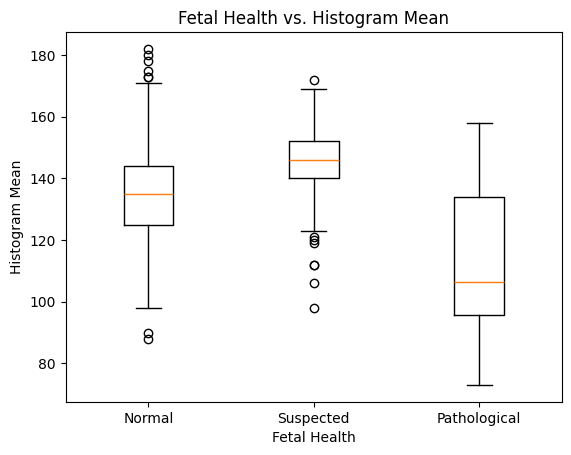

In [ ]:

health = [df[df['fetal_health'] == i]['histogram_mean'].dropna() for i in [1., 2., 3.]]

plt.boxplot(health, labels=['Normal', 'Suspected', 'Pathological'])

plt.title("Fetal Health vs. Histogram Mean")
plt.xlabel('Fetal Health')
plt.ylabel('Histogram Mean')

plt.show()

#HELP WITH HISTOGRAMS TO FIND OUTLIERS --> SHOULD I GET RID OF THEM, OR JUST ACKNOWLEDGE

Outliers, but would make sense because heart rate can vary a lot depending on the health of a fetus

Does a low/high heart rate cause a fetus' health to change or is it just representative of health issues caused by something else? Dependent variable or independent?

Looking at how we can use them to predict, so not too important for the research question if they represent a fetus' health or cause a fetus' health to change

**Choose Your Analysis Approach**

In [ ]:
df_h.describe()

,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Accuracy Score:  0.8661971830985915


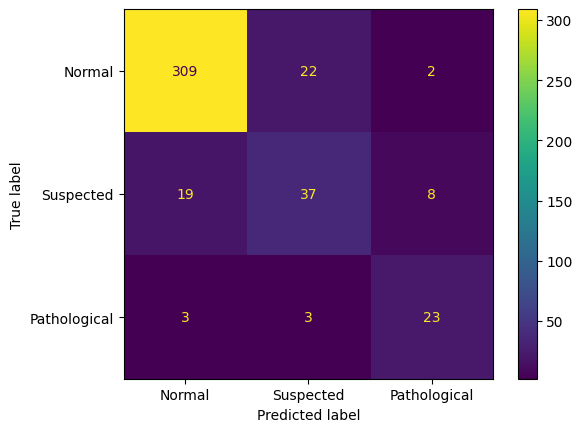

In [ ]:
features = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
label = df['fetal_health']

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict, display_labels=["Normal", "Suspected", "Pathological"])

{1: np.float64(88.96713615023474), 3: np.float64(89.43661971830986), 5: np.float64(87.32394366197182), 7: np.float64(88.73239436619718), 9: np.float64(88.73239436619718), 11: np.float64(89.2018779342723), 13: np.float64(89.67136150234741), 15: np.float64(89.67136150234741), 17: np.float64(89.67136150234741), 19: np.float64(88.96713615023474), 21: np.float64(88.49765258215963), 23: np.float64(87.55868544600939), 25: np.float64(88.26291079812206), 27: np.float64(88.73239436619718), 29: np.float64(87.55868544600939), 31: np.float64(87.55868544600939), 33: np.float64(87.79342723004694), 35: np.float64(87.55868544600939), 37: np.float64(87.32394366197182), 39: np.float64(87.08920187793427), 41: np.float64(86.85446009389672), 43: np.float64(86.85446009389672), 45: np.float64(86.61971830985915), 47: np.float64(86.61971830985915), 49: np.float64(86.3849765258216)}


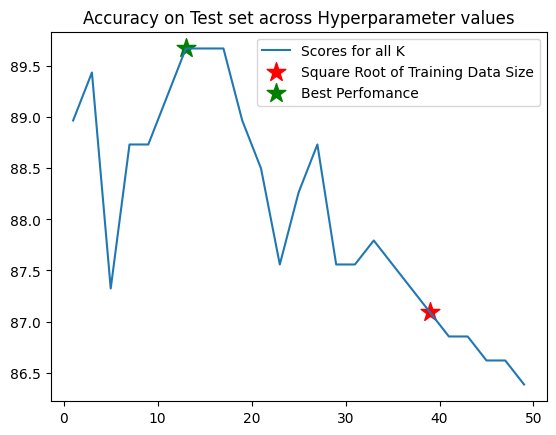

Top score of optimal classifier: 89.67136150234741
Best Value of K to use 13


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['fetal_health', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value']], df[['fetal_health']],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of K to use " + str(best_k))

In [ ]:
features = df_h.drop(columns='fetal_health')
label = df_h['fetal_health']

feature_selector = SelectKBest(k = 1)
feature_selector.fit_transform(features, label)

best_features = df_h[feature_selector.get_feature_names_out()]

best_features.head()

,histogram_mean
0,137.0
1,136.0
2,135.0
3,134.0
4,136.0


Histogram mean is the best variable from the histograms to predict fetus health

machine learning model confuses suspected and normal the most

In [ ]:
corr_matrix = df_h[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']].corr()
print(corr_matrix)

                            histogram_width  histogram_min  histogram_max  \
histogram_width                    1.000000      -0.898519       0.690769   
histogram_min                     -0.898519       1.000000      -0.303286   
histogram_max                      0.690769      -0.303286       1.000000   
histogram_number_of_peaks          0.747071      -0.670287       0.517652   
histogram_number_of_zeroes         0.317276      -0.306567       0.183766   
histogram_mode                    -0.159261       0.353067       0.235877   
histogram_mean                    -0.280846       0.486121       0.191108   
histogram_median                  -0.168854       0.400191       0.292680   
histogram_variance                 0.615884      -0.545091       0.439094   
histogram_tendency                 0.118152      -0.242579      -0.143111   
fetal_health                      -0.068789       0.063175      -0.045265   

                            histogram_number_of_peaks  \
histogram_width   

fetal health most strongly correlates with histogram mean, median and mode, but nothing is close to one

histogram mean, median, and mode are all strongly positively correlated

In [ ]:
anova_groups = [group['histogram_mean'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 297.625496574468 , 1.1456600580828941e-114


accept alternate hypothesis --> there is a connection between histogram mean and fetus health

In [ ]:
anova_groups = [group['histogram_median'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 248.77223746855182 , 8.606065098494105e-98


In [ ]:
anova_groups = [group['histogram_mode'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 275.1176959186366 , 5.7204291639185e-107


In [ ]:
anova_groups = [group['histogram_max'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 2.4649225724641823 , 0.08525870289517354


In [ ]:
anova_groups = [group['histogram_min'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 87.34050292981591 , 3.534809922276581e-37


In [ ]:
anova_groups = [group['histogram_number_of_zeroes'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 2.19637320852632 , 0.11145837726875545


In [ ]:
anova_groups = [group['histogram_number_of_peaks'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 12.104834133185367 , 5.9249663781721466e-06


In [ ]:
anova_groups = [group['histogram_variance'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 150.79684903736654 , 5.7962886407432025e-62


In [ ]:
anova_groups = [group['histogram_tendency'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 44.542294031638086 , 1.1230069544223168e-19


In [ ]:
anova_groups = [group['accelerations'].values for name, group in df.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 196.0275228578607 , 7.520612441198513e-79


In [ ]:
anova_groups = [group['baseline value'].values for name, group in df.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 140.62107554190106 , 4.457097803013098e-58


In [ ]:
anova_groups = [group['light_decelerations'].values for name, group in df.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 66.864754399964 , 6.901148044792995e-29


In [ ]:
anova_groups = [group['severe_decelerations'].values for name, group in df.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 28.44815598710158 , 6.423596107926146e-13


In [ ]:
anova_groups = [group['prolongued_decelerations'].values for name, group in df.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 505.85320558973683 , 2.2102380083164557e-180


In [ ]:
anova_groups = [group['abnormal_short_term_variability'].values for name, group in df.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 343.8204188828751 , 4.472367806072668e-130


In [ ]:
anova_groups = [group['percentage_of_time_with_abnormal_long_term_variability'].values for name, group in df.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: 345.15638462899716 , 1.6311478183567167e-130


In [ ]:
comp = mc.MultiComparison(df['histogram_mean'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   1.0    2.0   9.6572   0.0   7.6136  11.7008   True
   1.0    3.0 -22.1248   0.0 -24.6886 -19.5611   True
   2.0    3.0  -31.782   0.0 -34.8619 -28.7022   True
-----------------------------------------------------


written null hypothesis: There is no significant difference between histogram means for each of the three fetal health classification --> rejected

In [ ]:
comp = mc.MultiComparison(df['histogram_width'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   1.0    2.0 -24.2407    0.0 -29.8732 -18.6081   True
   1.0    3.0   4.9466 0.2283  -2.1196  12.0128  False
   2.0    3.0  29.1873    0.0  20.6986  37.6759   True
------------------------------------------------------


written null hypothesis: There is no significant difference between histogram width for each of the three fetal health classification --> accepted

In [ ]:
comp = mc.MultiComparison(df['histogram_min'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   1.0    2.0  22.2091    0.0  17.9955  26.4227   True
   1.0    3.0  -7.1028 0.0047  -12.389  -1.8167   True
   2.0    3.0  -29.312    0.0 -35.6622 -22.9617   True
------------------------------------------------------


written null hypothesis: There is no significant difference between histogram minimum for each of the three fetal health classification --> rejected

In [ ]:
comp = mc.MultiComparison(df['histogram_max'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0  -2.0316 0.1723 -4.6895 0.6263  False
   1.0    3.0  -2.1563 0.2832 -5.4907 1.1782  False
   2.0    3.0  -0.1247 0.9971 -4.1304  3.881  False
---------------------------------------------------


written null hypothesis: There is no significant difference between histogram maximum for each of the three fetal health classification --> accepted

In [ ]:
comp = mc.MultiComparison(df['histogram_number_of_peaks'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.8513    0.0 -1.2862 -0.4164   True
   1.0    3.0     0.28  0.451 -0.2656  0.8256  False
   2.0    3.0   1.1313 0.0002  0.4759  1.7867   True
----------------------------------------------------


written null hypothesis: There is no significant difference between histogram number of peaks for each of the three fetal health classification --> accepted

In [ ]:
comp = mc.MultiComparison(df['histogram_number_of_zeroes'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0  -0.0913 0.1015 -0.1959 0.0133  False
   1.0    3.0   0.0112  0.978   -0.12 0.1425  False
   2.0    3.0   0.1025 0.2792 -0.0551 0.2602  False
---------------------------------------------------


written null hypothesis: There is no significant difference between histogram number of zeroes for each of the three fetal health classification --> accepted

In [ ]:
comp = mc.MultiComparison(df['histogram_mode'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   1.0    2.0   8.2973   0.0   6.1325  10.4622   True
   1.0    3.0 -23.6507   0.0 -26.3665 -20.9348   True
   2.0    3.0  -31.948   0.0 -35.2105 -28.6854   True
-----------------------------------------------------


written null hypothesis: There is no significant difference between histogram mode for each of the three fetal health classification --> rejected

In [ ]:
comp = mc.MultiComparison(df['histogram_median'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   1.0    2.0   8.6114   0.0   6.6804  10.5423   True
   1.0    3.0 -18.8973   0.0 -21.3197 -16.4749   True
   2.0    3.0 -27.5087   0.0 -30.4187 -24.5986   True
-----------------------------------------------------


written null hypothesis: There is no significant difference between histogram median for each of the three fetal health classification --> rejected

In [ ]:
comp = mc.MultiComparison(df['histogram_variance'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
   1.0    2.0 -10.2662   0.0 -14.2872 -6.2452   True
   1.0    3.0  33.2532   0.0  28.2087 38.2977   True
   2.0    3.0  43.5194   0.0  37.4594 49.5794   True
----------------------------------------------------


written null hypothesis: There is no significant difference between histogram variance for each of the three fetal health classification --> rejected

In [ ]:
comp = mc.MultiComparison(df['histogram_tendency'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0   0.0919 0.0403  0.0032  0.1806   True
   1.0    3.0  -0.4159    0.0 -0.5272 -0.3045   True
   2.0    3.0  -0.5078    0.0 -0.6415  -0.374   True
----------------------------------------------------


written null hypothesis: There is no significant difference between histogram variance for each of the three fetal health classification --> rejected

In [ ]:
comp = mc.MultiComparison(df['accelerations'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.0037    0.0 -0.0042 -0.0032   True
   1.0    3.0  -0.0036    0.0 -0.0043 -0.0029   True
   2.0    3.0   0.0001 0.9358 -0.0007  0.0009  False
----------------------------------------------------


written null hypothesis: There is no significant difference between accelerations for each of the three fetal health classification --> accepted

In [ ]:
comp = mc.MultiComparison(df['light_decelerations'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   1.0    2.0  -0.0014   0.0 -0.0018 -0.001   True
   1.0    3.0   0.0017   0.0  0.0012 0.0023   True
   2.0    3.0   0.0031   0.0  0.0025 0.0038   True
--------------------------------------------------


written null hypothesis: There is no significant difference between light decelerations for each of the three fetal health classification --> rejected

In [ ]:
comp = mc.MultiComparison(df['severe_decelerations'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
   1.0    2.0     -0.0 0.9844  -0.0   0.0  False
   1.0    3.0      0.0    0.0   0.0   0.0   True
   2.0    3.0      0.0    0.0   0.0   0.0   True
------------------------------------------------


written null hypothesis: There is no significant difference between severe decelerations for each of the three fetal health classification --> accepted

In [ ]:
comp = mc.MultiComparison(df['prolongued_decelerations'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   1.0    2.0      0.0 0.3313   -0.0 0.0001  False
   1.0    3.0   0.0012    0.0 0.0011 0.0013   True
   2.0    3.0   0.0012    0.0 0.0011 0.0013   True
--------------------------------------------------


written null hypothesis: There is no significant difference between prolongued decelerations for each of the three fetal health classification --> accepted

In [ ]:
comp = mc.MultiComparison(df['abnormal_short_term_variability'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  19.4358    0.0   17.22 21.6517   True
   1.0    3.0  22.0739    0.0 19.2941 24.8538   True
   2.0    3.0   2.6381 0.1529 -0.7014  5.9775  False
----------------------------------------------------


written null hypothesis: There is no significant difference between abnormal short term variability for each of the three fetal health classification --> accepted

In [ ]:
comp = mc.MultiComparison(df['percentage_of_time_with_abnormal_long_term_variability'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  23.9858    0.0 21.6159 26.3557   True
   1.0    3.0  17.8019    0.0 14.8288  20.775   True
   2.0    3.0  -6.1839 0.0001 -9.7555 -2.6123   True
----------------------------------------------------


written null hypothesis: There is no significant difference between abnormal long term variability for each of the three fetal health classification --> rejected

why am I getting nan as the results of these tests?

Accuracy Score:  0.8943661971830986


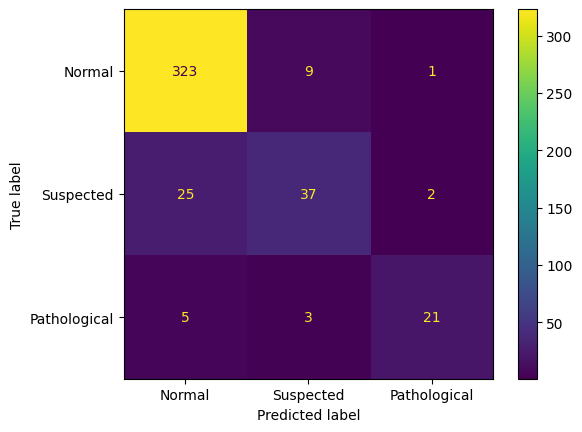

In [ ]:
#WITH ACCELERATIONS, DECELERATIONS, VARIABILITY
features = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value']]
label = df['fetal_health']

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 13)

model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict, display_labels=["Normal", "Suspected", "Pathological"])


More accurate with more variables included

In [ ]:
features = df_h.drop(columns='fetal_health')
label = df['fetal_health']

feature_selector = SelectKBest(k = 2)
feature_selector.fit_transform(features, label)

best_features = df[feature_selector.get_feature_names_out()]

best_features.head()

,histogram_mode,histogram_mean
0,120.0,137.0
1,141.0,136.0
2,141.0,135.0
3,137.0,134.0
4,137.0,136.0


In [ ]:
corr_matrix_big  = df[['fetal_health', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value']].corr()
print(corr_matrix_big)

                                                    fetal_health  \
fetal_health                                            1.000000   
histogram_width                                        -0.068789   
histogram_min                                           0.063175   
histogram_max                                          -0.045265   
histogram_number_of_peaks                              -0.023666   
histogram_number_of_zeroes                             -0.016682   
histogram_mode                                         -0.250412   
histogram_mean                                         -0.226985   
histogram_median                                       -0.205033   
histogram_variance                                      0.206630   
histogram_tendency                                     -0.131976   
percentage_of_time_with_abnormal_long_term_vari...      0.426146   
abnormal_short_term_variability                         0.471191   
accelerations                                   

Linear and logistic Regression

In [ ]:
X = df[['fetal_health', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value', 'baseline value']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[325   3   5]
 [ 31  31   2]
 [  0   5  24]]
              precision    recall  f1-score   support

         1.0       0.91      0.98      0.94       333
         2.0       0.79      0.48      0.60        64
         3.0       0.77      0.83      0.80        29

    accuracy                           0.89       426
   macro avg       0.83      0.76      0.78       426
weighted avg       0.89      0.89      0.88       426



In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[323   0  10]
 [ 63   0   1]
 [ 19   1   9]]
              precision    recall  f1-score   support

         1.0       0.80      0.97      0.88       333
         2.0       0.00      0.00      0.00        64
         3.0       0.45      0.31      0.37        29

    accuracy                           0.78       426
   macro avg       0.42      0.43      0.41       426
weighted avg       0.65      0.78      0.71       426



the logistic regression model is much less accurate when variables that have to do with accelerations, decelerations, and variablity are invovled.

in my presentation and paper it is important to point out that heart rate histograms alone are not great for predicting a fetus' health, but pairing them with information on accelerations, decelerations, and variability (things that can be suggested by/noticed/flagged by a heart rate histogram) make the predictions much more successful. The variables I looked at in addition to the histogram variables do not direclty come from a heart rate histogram, but go hand in hand with the information and are usually collected simoultaneously with a heart rate histogram.

Oversampling below

**ML Models less Sensitive to inblanaced data**

decision tree, random forest classifier, gradient boosting classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value', 'baseline value']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[320  11   2]
 [ 20  42   2]
 [  1   1  27]]
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       333
         2.0       0.78      0.66      0.71        64
         3.0       0.87      0.93      0.90        29

    accuracy                           0.91       426
   macro avg       0.86      0.85      0.85       426
weighted avg       0.91      0.91      0.91       426



In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value', 'baseline value']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[327   5   1]
 [ 18  45   1]
 [  1   2  26]]
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       333
         2.0       0.87      0.70      0.78        64
         3.0       0.93      0.90      0.91        29

    accuracy                           0.93       426
   macro avg       0.91      0.86      0.88       426
weighted avg       0.93      0.93      0.93       426



In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value', 'baseline value']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[325   6   2]
 [ 12  52   0]
 [  1   0  28]]
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.90      0.81      0.85        64
         3.0       0.93      0.97      0.95        29

    accuracy                           0.95       426
   macro avg       0.93      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



these three ML models improved the predictions so much, I think it was the inblance causing issues.


new ML models with only histogram attributes below

In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[300  26   7]
 [ 16  38  10]
 [  3   3  23]]
              precision    recall  f1-score   support

         1.0       0.94      0.90      0.92       333
         2.0       0.57      0.59      0.58        64
         3.0       0.57      0.79      0.67        29

    accuracy                           0.85       426
   macro avg       0.69      0.76      0.72       426
weighted avg       0.86      0.85      0.85       426



In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[320  11   2]
 [ 26  32   6]
 [  4   3  22]]
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94       333
         2.0       0.70      0.50      0.58        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.78      0.74      0.75       426
weighted avg       0.87      0.88      0.87       426



In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[316  14   3]
 [ 29  31   4]
 [  4   3  22]]
              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       333
         2.0       0.65      0.48      0.55        64
         3.0       0.76      0.76      0.76        29

    accuracy                           0.87       426
   macro avg       0.77      0.73      0.75       426
weighted avg       0.86      0.87      0.86       426



the new ML models that are insensitive to inbalance make predictions with just histogram attributes successful

RESEARCH ON THE NEW ML MODELS:



Decision Tree:
*  "tree like" structure
- supervised learning algorithm
- Internal nodes represent attribute tests
- Branches represent attribute values
- Leaf nodes represent final decisions or predictions.
- a flow chart to help make decisions
- a series of questions that will be asked until the select fetus ("row") can be sorted into a group (health classification)
- https://www.geeksforgeeks.org/machine-learning/decision-tree-introduction-example/




Random Forest Classifier:
*   fits a number of decision tree classifiers
- supervised machine learning algorithm
- can solve numeric and cateogrical classification problems
- a combination of decision trees
- each tree is made up of a subset of data and features
- choosing the most popular prediction of the trees
- https://www.datacamp.com/tutorial/random-forests-classifier-python

Gradient Boosting Classification:
*   collection of "weaker" models
- boosting method which iteratively learns from regression, classification, and ranking
- https://www.digitalocean.com/community/tutorials/gradient-boosting-for-classification

In [ ]:


X = df[['histogram_min','histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[319  11   3]
 [ 26  31   7]
 [  8   2  19]]
              precision    recall  f1-score   support

         1.0       0.90      0.96      0.93       333
         2.0       0.70      0.48      0.57        64
         3.0       0.66      0.66      0.66        29

    accuracy                           0.87       426
   macro avg       0.75      0.70      0.72       426
weighted avg       0.86      0.87      0.86       426



used the histogram info where we can reject the null hypothesis --> used the variables where each difference between the fetal health classification is statistically significant

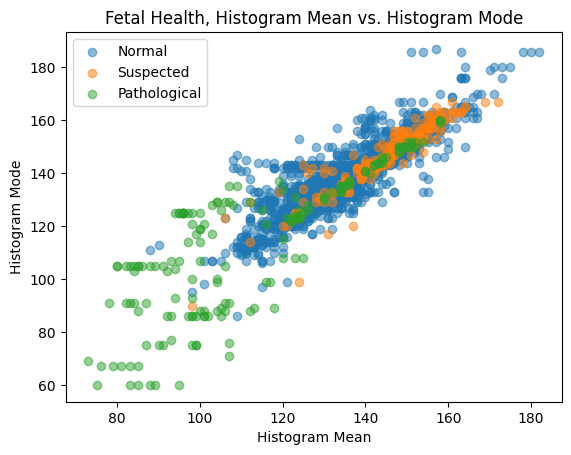

In [ ]:
plt.scatter(df[df['fetal_health']==1]['histogram_mean'], df[df['fetal_health']==1]['histogram_mode'], alpha = 0.5, label = 'Normal')
plt.scatter(df[df['fetal_health']==2]['histogram_mean'], df[df['fetal_health']==2]['histogram_mode'], alpha = 0.5, label = 'Suspected')
plt.scatter(df[df['fetal_health']==3]['histogram_mean'], df[df['fetal_health']==3]['histogram_mode'], alpha = 0.5, label = 'Pathological')

plt.legend()
plt.ylabel("Histogram Mode")
plt.xlabel("Histogram Mean")
plt.title("Fetal Health, Histogram Mean vs. Histogram Mode")
plt.show()

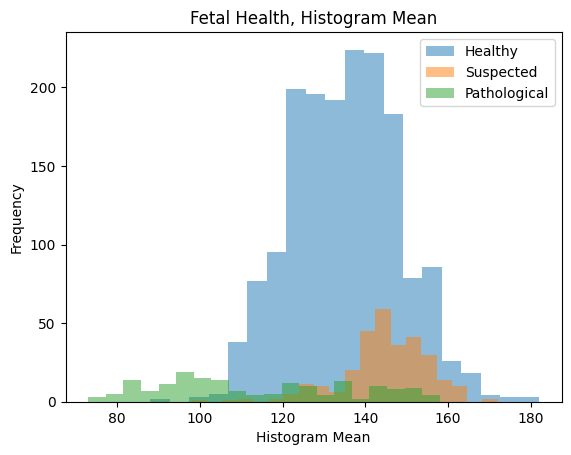

In [ ]:
plt.hist(df[df['fetal_health'] == 1]['histogram_mean'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_mean'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_mean'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Mean")
plt.xlabel('Histogram Mean')
plt.ylabel('Frequency')

plt.show()

A table to show the variables included in my analysis

In [ ]:
df_h.head(3)

,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


the results of t test and p value to show that the difference between each fetus health classification is significant for histogram mean

In [ ]:
comp = mc.MultiComparison(df['histogram_mean'], df['fetal_health'])
result = comp.tukeyhsd()
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   1.0    2.0   9.6572   0.0   7.6136  11.7008   True
   1.0    3.0 -22.1248   0.0 -24.6886 -19.5611   True
   2.0    3.0  -31.782   0.0 -34.8619 -28.7022   True
-----------------------------------------------------


in my presentation and paper it is important to point out that heart rate histograms alone are not great for predicting a fetus' health, but pairing them with information on accelerations, decelerations, and variability (things that can be suggested by/noticed/flagged by a heart rate histogram) make the predictions much more successful. The variables I looked at in addition to the histogram variables do not direclty come from a heart rate histogram, but go hand in hand with the information and are usually collected simoultaneously with a heart rate histogram.

These two table shows how well a heart rate histogram can actually predict a fetus' health (one w extra variables and one w out)

[[317  12   4]
 [ 26  32   6]
 [  9   1  19]]
              precision    recall  f1-score   support

         1.0       0.90      0.95      0.93       333
         2.0       0.71      0.50      0.59        64
         3.0       0.66      0.66      0.66        29

    accuracy                           0.86       426
   macro avg       0.76      0.70      0.72       426
weighted avg       0.86      0.86      0.86       426



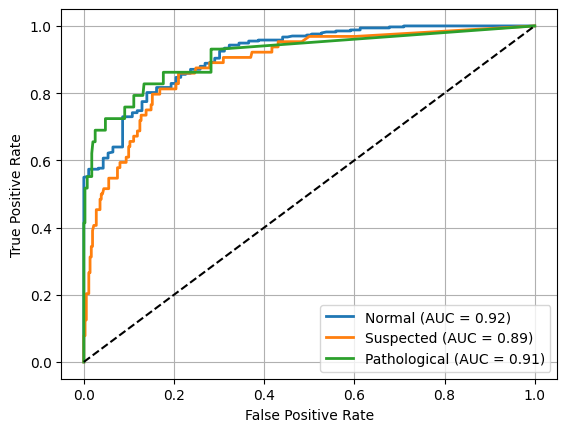

In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
n_classes=y_test_binarized.shape[1]

classifier= OneVsRestClassifier(RandomForestClassifier())
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

labels = ['Normal', 'Suspected', 'Pathological']

for i  in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


[[324   8   1]
 [ 18  44   2]
 [  1   2  26]]
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       333
         2.0       0.81      0.69      0.75        64
         3.0       0.90      0.90      0.90        29

    accuracy                           0.92       426
   macro avg       0.89      0.85      0.87       426
weighted avg       0.92      0.92      0.92       426



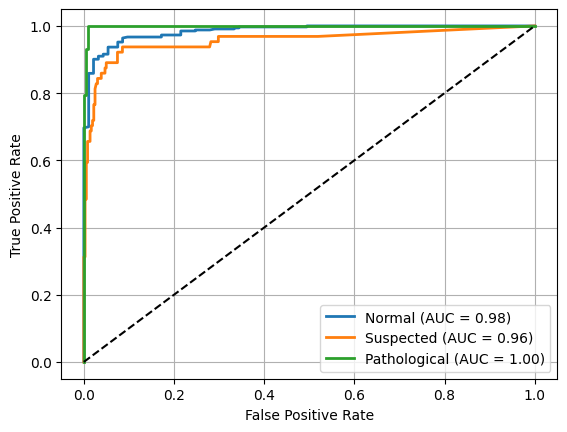

In [ ]:
#with accelerations, decelerations, baseline value, and variability

X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mean', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
n_classes=y_test_binarized.shape[1]

classifier= OneVsRestClassifier(RandomForestClassifier())
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

labels = ['Normal', 'Suspected', 'Pathological']

for i  in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

here are k nearest neighbor classifiers that I started out with

How to make the decision barrier scatter plot to show the forest classifier

https://blog.devops.dev/a-deep-dive-into-the-random-forest-algorithm-d4a8950507a3

https://www.numberanalytics.com/blog/ultimate-guide-histograms-cardiac-pacing

https://pmc.ncbi.nlm.nih.gov/articles/PMC6510058/

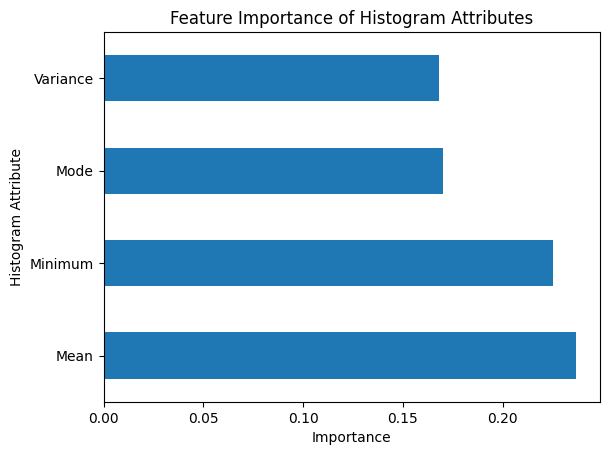

In [ ]:
X = df[['histogram_min','histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

(pd.Series(model.feature_importances_, index=X.columns)
.nlargest(4)
.plot(kind='barh'))

new_labels = ['Mean', 'Minimum', 'Mode', 'Variance']
plt.gca().set_yticklabels(new_labels)

plt.title("Feature Importance of Histogram Attributes")
plt.xlabel("Importance")
plt.ylabel("Histogram Attribute")
plt.show()

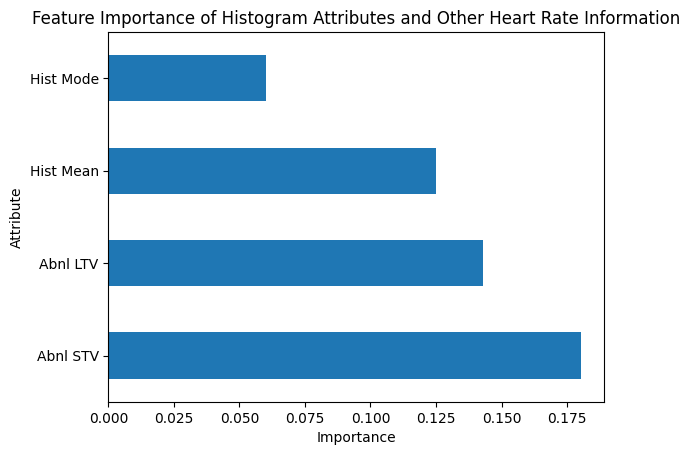

In [ ]:
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value', 'baseline value']]
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

(pd.Series(model.feature_importances_, index=X.columns)
.nlargest(4)
.plot(kind='barh'))

new_labels = ['Abnl STV', 'Abnl LTV', 'Hist Mean', 'Hist Mode']
plt.gca().set_yticklabels(new_labels)

plt.title("Feature Importance of Histogram Attributes and Other Heart Rate Information")
plt.xlabel("Importance")
plt.ylabel("Attribute")
plt.show()

these two plots show the relative significance of the variables in predicting the fetus' health --> four most helpful variables

**Discussion**

XX

**Link to Github Repository**